##Ecuación de difusión 

$\frac{\partial u(x,y,t)}{\partial t}=\nu \frac{\partial ^2 u(x,y,t)}{\partial x ^2}+\nu \frac{\partial ^2 u(x,y,t)}{\partial y ^2}$

Ahora para discretizar esta situación vemos al campo como red particionada en cuadros indicados por los indices $i,j$. Fijandose en el punto $(i,j)$ el cambio en el tiempo esta dado como el lado izquierdo de abajo, avanzando sobre $n$. Pero el cambio en $x$ se toma como en el caso de 1D pero dejando fijo en el punto en $y$, osea $j$. Algo similar para el cambio en $y$, pero ahora los saltos son en la dirección $y , (j)$, fijandose en la actual $x, (i)$. 


Discretización \\
$\frac{u^{n+1}_{i,j}-u^{n-1}_{i,j}}{dt}= \nu \frac{u^n_{i+1,j}-2u^n_{i,j}+u^n_{i-1,j}}{dx^2}+\nu \frac{u^n_{i,j+1}-2u^n_{i,j}+u^n_{i,j-1}}{dy^2}$

Iteración \\
$u^{n+1}_{i,j}= u^{n-1}_{i,j}+\frac{\nu dt}{dx^2} (u^n_{i+1,j}-2u^n_{i,j}+u^n_{i-1,j})+\frac{\nu dt}{dy^2} (u^n_{i,j+1}-2u^n_{i,j}+u^n_{i,j-1})$

In [0]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
def difusion(nt, nxy):
  #nxy = 41
  nu = 0.3
  dx = 2/(nxy - 1)
  dy = 2/(nxy - 1)
  sigma = 0.25
  dt = (sigma * dx * dy) / (nu)

  u = np.ones((nxy, nxy))  #crea la red que simula el campo escalar
  u[int(.7 / dy):int(1.2 / dy + 1),int(.7 / dx):int(1.2 / dx + 1)] = 2 #Valor inicial del campo 

  for n in range(nt):
    un = u.copy()
    for j in range(1, nxy-1):
      for i in range(1, nxy-1):
        u[i,j] = un[i,j]+nu*dt/(dx**2)*(un[i+1,j]-2*un[i,j]+un[i-1,j])+nu*dt/(dy**2)*(un[i,j+1]-2*un[i,j]+un[i,j-1]) 
  
  x = np.linspace(0, 2, nxy)
  y = np.linspace(0, 2, nxy)
  
  fig = plt.figure()
  ax1 = fig.gca(projection='3d')
  X, Y = np.meshgrid(x, y)
  surf = ax1.plot_surface(X, Y, u, antialiased=False)

  ax1.set_xlim(0, 2)
  ax1.set_ylim(0, 2)
  ax1.set_zlim(1, 2.5)


  plt.show()

Evoluación de la condición inicial del campo

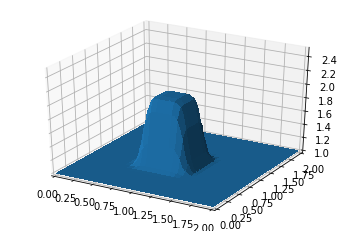

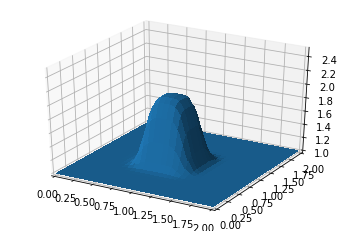

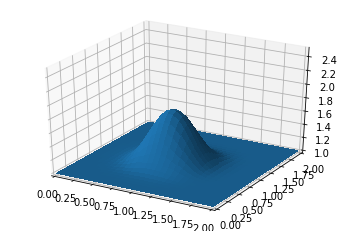

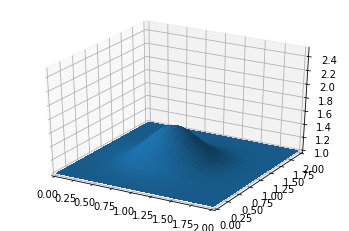

In [112]:
difusion(5, 61)
difusion(10, 61)
difusion(50, 61)
difusion(100, 61)